# NETD 


On commence avec un seul pixel, plein d'imagettes, et plusieurs fois.

On a une population de tirage de bruit, de moyenne nulle, de variance $Var_{tvh}$.
On tire T valeurs, et on répète N fois. Pour chaque tirage, on mesure la variance empirique non biaisée. 
$$E[s^2(T)] = Var_{tvh}$$
$$Var(s^2(T)) = \frac{2(T-1)\sigma_{tvh}^4}{(T-ddof)^2}$$
De plus, si le bruit est gaussien, la distribution de $s^2$ est gaussienne également.

In [4]:
import numpy as np
import scipy.stats


from noise3d import genseq
from noise3d import noise
from noise3d import bias

import matplotlib.pyplot as plt

def var_CI(var_est, N_ech, N_deg, k_est, alpha, verbose=False):
    y_min = 0# y_min tq Chi2(N_deg) = 1-alpha/2
    y_max = 0 # y_max tq Chi2(Ndeg) = alpha/2
    min_CI = (N_ech - k_est)*var_est/y_max
    max_CI = (N_ech - k_est)*var_est/y_min
    if verbose:
        print("True variance has {} probability to be in [{} ; {}] interval".format(1-alpha, min_CI, max_CI))
    return (min_CI, max_CI)
    

def compute_results(var, V, H, T, N, ddof):

    vec_netd = []
    vec_netd_std = []
    for n in range(N):
        seq = genseq.genseq_3dnoise_seq(T, V, H, (0, 0, 0, 0, 0, 0, var_tvh))
        # Mesure de la variance empirique non biasiée
        vec_netd.append(noise.var_netd(seq, axis=0, ddof=ddof))
    vec_netd = np.asarray(vec_netd)
    
    
    ech = np.linspace(np.min(vec_netd), np.max(vec_netd), 100)
    val, bins, patchs = plt.hist(vec_netd, bins=ech, density=True)
    
    exp_mean = var_tvh*(T-1)/(T-ddof)
    exp_var = 2*var_tvh**2*(T-1)/((T-ddof)**2*(V*H))
    
    mean = np.mean(vec_netd)
    var = np.var(vec_netd)
    
    print("Valeur attendue : {}".format(var_tvh))
    print("Moyenne des variances mesurée : {}".format(mean))
    print("Moyenne attendue : {}".format(exp_mean))
    print("Ecart en % : {}".format((mean/exp_mean-1)*100))
    print("Variance des variances mesurée : {}".format(var))
    print("Variance attendue : {}".format(exp_var))
    print("Ecart en % : {}".format((var/exp_var-1)*100))

    
    ech_gauss = noise.gauss(ech, np.mean(vec_netd), np.std(vec_netd))
    # la distribution est un chi2 à VH(T-1) dof, et multiplié par sigma2/(VH(T-k))
    ech_chi2 = scipy.stats.chi2.pdf(ech,
                                    df=(T-1)*(V*H), 
                                    scale=var_tvh/((T-ddof)*V*H))

    plt.plot(ech, ech_gauss)
    plt.plot(ech, ech_chi2)
        

## Non biaisée

### 1 pixel, 10 images

On vérifie que : 
- le bruit en entrée est gaussien
- la moyenne des variance empiriques mesurées vaut bien la variance attendue
- la variance des variances empiriques mesurées vaut bien $2Var_{tvh}^2/(T-1)
- la distribution des variances est gaussienne

Valeur attendue : 1
Moyenne des variances mesurée : 0.9987786047707764
Moyenne attendue : 1.0
Ecart en % : -0.12213952292235986
Variance des variances mesurée : 0.22096015690284335
Variance attendue : 0.2222222222222222
Ecart en % : -0.5679293937204899


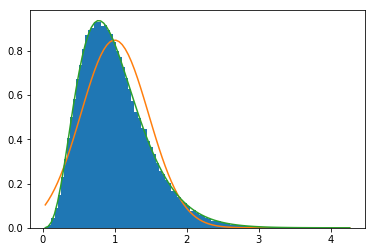

In [10]:
var_tvh = 1
V = 1
H = 1
T = 10
N = 100000
ddof=1
compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixel, 30 images

Valeur attendue : 1
Moyenne des variances mesurée : 1.0006865114192969
Moyenne attendue : 1.0
Ecart en % : 0.06865114192968758
Variance des variances mesurée : 0.10546069148012488
Variance attendue : 0.10526315789473684
Ecart en % : 0.1876569061186384


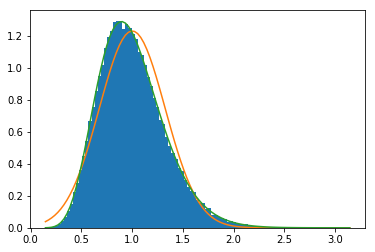

In [11]:
var_tvh = 1
V = 1
H = 1
T = 20
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixel, 100 images

Valeur attendue : 1
Moyenne des variances mesurée : 0.9993901154826274
Moyenne attendue : 1.0
Ecart en % : -0.06098845173726497
Variance des variances mesurée : 0.020133164257258675
Variance attendue : 0.020202020202020204
Ecart en % : -0.34083692656956543


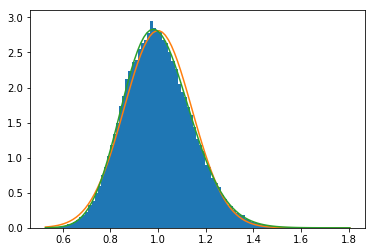

In [12]:
var_tvh = 1
V = 1
H = 1
T = 100
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixels, 1000 images

Valeur attendue : 1
Moyenne des variances mesurée : 1.0002324884099414
Moyenne attendue : 1.0
Ecart en % : 0.02324884099413893
Variance des variances mesurée : 0.0020010399885997654
Variance attendue : 0.002002002002002002
Ecart en % : -0.04805256944171443


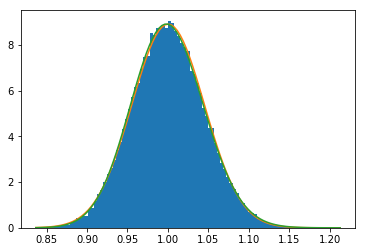

In [22]:
var_tvh = 1
V = 1
H = 1
T = 1000
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

### 100 pixels, 100 images

On moyenne les variances mesurées sur 100 pixels. La moyenne doit restée inchangée, mais la variance des variances mesurées doit être diminuée en 
$$Var(s^2)= \frac{2Var_{tvh}^2}{(T-1)VH}$$

Valeur attendue : 1
Moyenne des variances mesurée : 0.9998807176746596
Moyenne attendue : 1.0
Ecart en % : -0.01192823253404196
Variance des variances mesurée : 0.005063562127012545
Variance attendue : 0.005050505050505051
Ecart en % : 0.2585301148483765


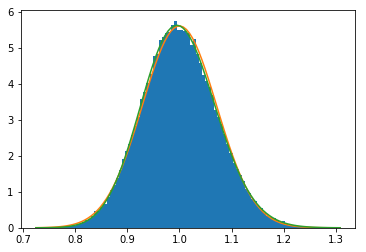

In [4]:
var_tvh = 1
V = 2
H = 2
T = 100
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

Valeur attendue : 1
Moyenne des variances mesurée : 0.9999730952521022
Moyenne attendue : 1.0
Ecart en % : -0.0026904747897793513
Variance des variances mesurée : 0.00020297181618193568
Variance attendue : 0.00020202020202020202
Ecart en % : 0.4710490100581666


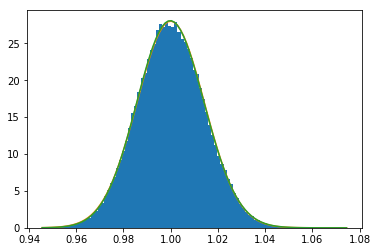

In [37]:
var_tvh = 1
V = 10
H = 10
T = 100
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

## NETD avec estimateur biaisé, impact du ddof
On fait les mêmes calculs mais avec un estimateur biaisé : ddof=0

### 1 pixel, 10 images, ddof=0

Le ddof introduit un bias dans l'espérance : 
$$E_{ddof=0}(s^2) = \frac{T-1}{T}Var_{tvh}$$
$$Var_{ddof=0}(s^2) = \frac{}{}

Valeur attendue : 1
Moyenne des variances mesurée : 0.9016980538281363
Moyenne attendue : 0.9
Ecart en % : 0.1886726475706979
Variance des variances mesurée : 0.18020314916705793
Variance attendue : 0.18
Ecart en % : 0.11286064836553145


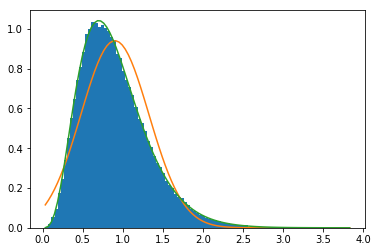

In [5]:
var_tvh = 1
V = 1
H = 1
T = 10
N = 100000
ddof=0

compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixel, 100 images, ddof=0

Valeur attendue : 1
Moyenne des variances mesurée : 0.990127874815705
Moyenne attendue : 0.99
Ecart en % : 0.012916648051009005
Variance des variances mesurée : 0.019873558757721236
Variance attendue : 0.0198
Ecart en % : 0.37150887737997795


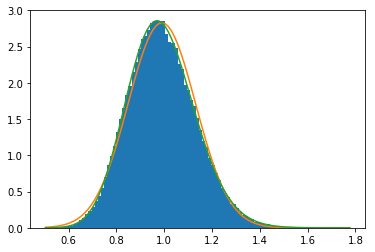

In [6]:
var_tvh = 1
V = 1
H = 1
T = 100
N = 100000
ddof=0
compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixel, 1000 images, ddof=0

Valeur attendue : 1
Moyenne des variances mesurée : 0.9987908320407162
Moyenne attendue : 0.999
Ecart en % : -0.02093773366204088
Variance des variances mesurée : 0.0019927257376229075
Variance attendue : 0.001998
Ecart en % : -0.26397709595058494


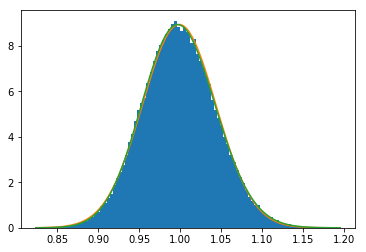

In [7]:
var_tvh = 1
V = 1
H = 1
T = 1000
N = 100000
ddof=0

compute_results(var_tvh, V, H, T, N, ddof)

### 100 pixels, 100 images

Valeur attendue : 1
Moyenne des variances mesurée : 0.9899711871858542
Moyenne attendue : 0.99
Ecart en % : -0.002910385267251847
Variance des variances mesurée : 0.0001969671835698637
Variance attendue : 0.000198
Ecart en % : -0.5216244596647934


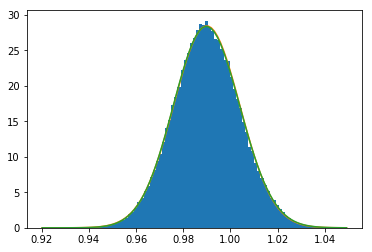

In [8]:
var_tvh = 1
V = 10
H = 10
T = 100
N = 100000
ddof=0

compute_results(var_tvh, V, H, T, N, ddof)

# Estimateur d'écart type

## Biais

Bias d'estimation de l'écart type par mesure d'écart type

In [19]:
import scipy.special.gamma as gamma

def bias_std(N):
    return np.sqrt(2/(N-1))*gamma(N/2)/gamma((N-1)/2)

for i in range(10, 100, 10):
    print(i)
    print(bias_std(i))

10
0.972659274121588
20
0.9869342675246553
30
0.9914180532926729
40
0.9936109428318858
50
0.9949113046697325
60
0.9957718784529567
70
0.9963834937664096
80
0.9968405291973458
90
0.99719501168301


# NETD et BSFR
On s'intéresse au cas où on ne considère que 2 sources de bruits : un bruit complêtement décorellé TVH, aussi appellé NETD, et un bruit spatial fixe décorellé VH, aussi appellé BSFR.


## Première méthode
Une première méthode "classique" pour estimer ces bruits est de : 
 - moyenner la séquence temporellement et calculer la variance de l'image 2D résultante : permet de 'lisser' le bruit temporel pour ne récupérer que le bruit spatial fixe 
 - calculer la variance temporelle de chaque pixel et moyenner l'image 2D de variance temporelle : permet de s'affranchir du bruit spatial (en ne prenant que la variance temporel pixel par pixel)